In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nums_from_string

# 100 pM dt 2s

In [10]:
df = pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_tracking/results/100pM/dt_2/evaluation/combined/combined_results.csv')

In [11]:
df

,track_id1,track_id2,count,iou,track_cost_cutoff,gap_closing_cost_cutoff,gap_closing_max_frame_count,seq
0,2,210,3,0.016216,1.1,1.6,0,0
1,4,3,9,0.066176,1.1,1.6,0,0
2,5,5,3,0.075000,1.1,1.6,0,0
3,6,137,3,0.018182,1.1,1.6,0,0
4,8,7,2,0.028986,1.1,1.6,0,0
...,...,...,...,...,...,...,...,...
9441,622,137,2,0.012121,1.5,0.0,2,0
9442,624,75,6,0.057143,1.5,0.0,2,0
9443,625,210,4,0.021622,1.5,0.0,2,0
9444,628,215,2,0.117647,1.5,0.0,2,0


In [23]:
df_track_cost_cutoff = df.groupby(['track_cost_cutoff']).mean().T

In [24]:
df_track_cost_cutoff

track_cost_cutoff,1.0,1.1,1.3,1.5,2.0
track_id1,356.509630,341.524910,313.883368,299.225789,279.554257
track_id2,114.738157,113.403184,114.069038,113.822365,114.808013
count,4.141593,4.232152,4.494247,4.691814,5.057318
iou,0.142714,0.152055,0.164631,0.172129,0.200082
gap_closing_cost_cutoff,1.007704,1.005239,1.007374,1.012199,1.009071
gap_closing_max_frame_count,0.960437,0.960452,0.958682,0.961477,0.953255
seq,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
df_gap_closing_cost_cutoff = df[df['track_cost_cutoff'] == 2.0].groupby(['gap_closing_cost_cutoff']).mean().T

In [26]:
df_gap_closing_cost_cutoff

gap_closing_cost_cutoff,0.0,1.5,1.6
track_id1,292.444976,272.919932,272.370497
track_id2,114.253589,115.262351,114.946827
count,4.760766,5.197615,5.234991
iou,0.194618,0.202303,0.203724
track_cost_cutoff,2.000000,2.000000,2.000000
gap_closing_max_frame_count,1.000000,0.931857,0.924528
seq,0.000000,0.000000,0.000000


In [27]:
df_gap_closing_max_frame_count = df[(df['track_cost_cutoff'] == 2.0) & (df['gap_closing_cost_cutoff'] == 1.6)].groupby(['gap_closing_max_frame_count']).mean().T

In [28]:
df_gap_closing_max_frame_count

gap_closing_max_frame_count,0,1,2
track_id1,292.444976,292.444976,221.515152
track_id2,114.253589,114.253589,116.703030
count,4.760766,4.760766,6.436364
iou,0.194618,0.194618,0.226793
track_cost_cutoff,2.000000,2.000000,2.000000
gap_closing_cost_cutoff,1.600000,1.600000,1.600000
seq,0.000000,0.000000,0.000000


In [31]:
#filter df by track_cost_cutoff and gap_closing_cost_cutoff and gap_closing_max_frame_count 
df_filtered = df[(df['track_cost_cutoff'] == 2.0) & (df['gap_closing_cost_cutoff'] == 1.6) & (df['gap_closing_max_frame_count'] == 2)]

<AxesSubplot: ylabel='Frequency'>

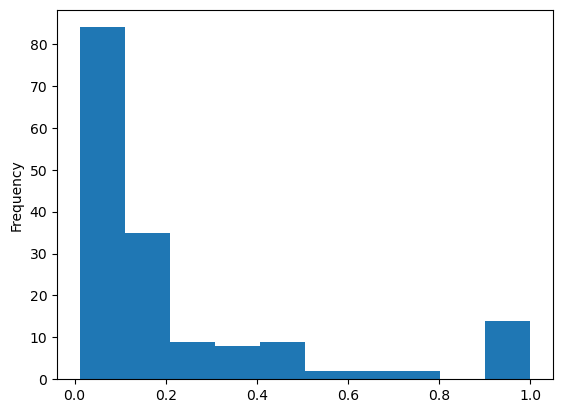

In [33]:
df_filtered.iou.plot(kind='hist')

In [34]:
df_filtered.iou.mean()

0.22679269846098207

In [6]:
s = '100pM 6 7.4'

nums_from_string.get_nums(s)

[100, 6, 7.4]

# dt 10 s

In [11]:
def get_best_params(df_heat,metric,n_top):

    df_heat['param'] = df_heat['track_cost_cutoff'].astype(str) + ' ' + df_heat['gap_closing_cost_cutoff'].astype(str) + ' ' + df_heat['gap_closing_max_frame_count'].astype(str)

    df_heat['ranking'] = df_heat[metric].rank(method='first',ascending=False)
    df_heat = df_heat.sort_values(by='ranking')

    # Get the n_top top parameters 

    best_params = [df_heat.iloc[0].param] #list of the best params

    for i in df_heat.iloc:
        if i.param not in best_params :
            best_params.append(i.param)
            if len(best_params) >= n_top: # check that you only take n_top
                break                                                    

    df_best_params = pd.DataFrame()

    for l,i in enumerate(best_params):
        df = df_heat[df_heat.param == i].copy(deep=True)
        df.loc[:,'top'] = l+1
        df_best_params = pd.concat([df_best_params,df])

    df_best_params.reset_index(inplace=True,drop=True)
    df_best_params

    return df_best_params

In [2]:
df_10 = pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_tracking/results/100pM/dt_10/evaluation/combined/combined_results.csv')

In [6]:
df_10

,Unnamed: 0,track_id1,track_id2,count,iou,track_cost_cutoff,gap_closing_cost_cutoff,gap_closing_max_frame_count,seq
0,0,2,3,12,0.428571,2.0,1.9,0,3
1,1,3,0,2,0.400000,2.0,1.9,0,3
2,2,7,218,3,0.157895,2.0,1.9,0,3
3,3,9,137,2,0.062500,2.0,1.9,0,3
4,4,10,210,2,0.052632,2.0,1.9,0,3
...,...,...,...,...,...,...,...,...,...
9838,58,108,210,3,0.083333,1.0,2.0,2,1
9839,59,110,75,2,0.105263,1.0,2.0,2,1
9840,60,111,137,2,0.055556,1.0,2.0,2,1
9841,61,114,215,2,0.400000,1.0,2.0,2,1


In [12]:
df_best = get_best_params(df_10,'iou',10)

In [13]:
df_best

,Unnamed: 0,track_id1,track_id2,count,iou,track_cost_cutoff,gap_closing_cost_cutoff,gap_closing_max_frame_count,seq,ranking,param,top
0,9,19,28,2,1.000000,2.0,1.9,0,3,1.0,2.0 1.9 0,1
1,1,3,0,3,1.000000,2.0,1.9,0,2,28.0,2.0 1.9 0,1
2,7,15,26,2,1.000000,2.0,1.9,0,2,29.0,2.0 1.9 0,1
3,19,40,64,2,1.000000,2.0,1.9,0,2,30.0,2.0 1.9 0,1
4,10,17,26,3,1.000000,2.0,1.9,0,0,148.0,2.0 1.9 0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2726,33,99,137,1,0.027778,1.5,0.0,0,2,9651.0,1.5 0.0 0,10
2727,41,115,137,1,0.027778,1.5,0.0,0,2,9652.0,1.5 0.0 0,10
2728,4,8,137,1,0.026316,1.5,0.0,0,1,9735.0,1.5 0.0 0,10
2729,11,27,210,1,0.025641,1.5,0.0,0,2,9777.0,1.5 0.0 0,10


<AxesSubplot: xlabel='top', ylabel='iou'>

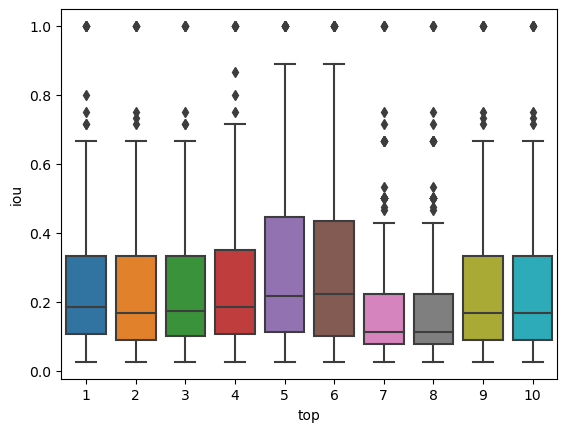

In [14]:
sns.boxplot(x='top',y='iou',data=df_best)

<AxesSubplot: ylabel='Frequency'>

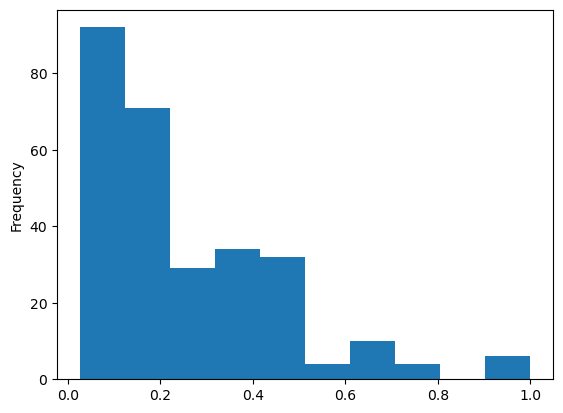

In [17]:
df_best[df_best.top == 1].iou.plot(kind='hist')